In [1]:
import pandas as pd
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
results = ascii.read('results.txt')
results_df = results.to_pandas()
results_df

,id,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.accretion_power,bayes.agn.accretion_power_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.PLW,...,best.UKIRT_WFCJ,best.ukirt.H,best.ukirt.Ks,best.WISE1,best.WISE2,best.WISE3,best.WISE4,best.PSW,best.PMW,best.PLW
0,2563,0.008212,0.028319,6.960402e+41,2.571055e+42,5.833838e+06,1.217124e+06,3.966365e+15,1.115633e+15,2.608077e+06,...,3.489171e+04,4.300199e+04,5.717351e+04,5.971508e+04,6.502855e+04,3.507646e+05,5.026335e+05,8.468381e+06,4.468929e+06,1.748205e+06
1,2598,0.008653,0.028117,1.307907e+42,4.255554e+42,2.752159e+07,6.985731e+06,5.104655e+15,2.529355e+15,8.517439e+06,...,6.312259e+04,7.780946e+04,1.002420e+05,9.312916e+04,8.998420e+04,4.311559e+05,6.609112e+05,1.391926e+07,7.597858e+06,3.059145e+06
2,2667,0.159021,0.049222,1.489504e+43,1.314000e+42,3.070251e+06,1.229029e+06,2.884157e+16,1.026053e+16,1.115826e+07,...,1.164001e+06,1.528710e+06,1.759312e+06,1.329861e+06,1.080468e+06,3.486890e+06,6.161812e+06,5.669464e+07,2.602202e+07,9.278643e+06
3,2700,0.008710,0.028339,1.178082e+42,3.867075e+42,6.877857e+06,3.484448e+06,4.023840e+16,1.130744e+16,5.714989e+06,...,1.585194e+05,2.123442e+05,2.949419e+05,2.223560e+05,2.065522e+05,6.105106e+05,8.255413e+05,1.327114e+07,6.875939e+06,2.650415e+06
4,2782,0.002965,0.017049,4.131568e+41,2.413911e+42,1.025126e+07,1.772926e+06,4.092540e+16,6.919470e+15,6.567183e+06,...,2.212096e+05,2.962174e+05,4.073974e+05,3.026435e+05,2.680289e+05,7.794602e+05,1.014437e+06,1.708280e+07,8.841923e+06,3.404471e+06
5,2850,0.000076,0.002772,6.987340e+39,2.574236e+41,1.290172e+07,1.591441e+06,7.789517e+15,1.433874e+15,4.663726e+06,...,5.796970e+04,6.854026e+04,8.454375e+04,6.574167e+04,6.151159e+04,5.436531e+05,8.235399e+05,1.996899e+07,1.088288e+07,4.369411e+06
6,2878,0.000179,0.005294,1.750464e+40,4.816713e+41,5.978403e+07,5.730968e+06,6.402648e+15,1.540939e+15,1.647432e+07,...,5.416210e+04,7.639046e+04,9.898941e+04,9.819900e+04,1.266602e+05,1.712106e+06,2.747733e+06,7.252254e+07,4.087766e+07,1.686626e+07
7,3015,0.035462,0.047840,5.567153e+42,7.516975e+42,5.522690e+06,2.953632e+05,2.111285e+16,2.470335e+15,3.977545e+06,...,1.345588e+05,1.708680e+05,2.287494e+05,1.873423e+05,1.733019e+05,7.247644e+05,1.097450e+06,1.934202e+07,1.002157e+07,3.865354e+06
8,3092,0.299624,0.055074,1.468707e+43,1.067637e+42,1.056547e+06,4.892256e+05,2.528412e+16,6.610492e+15,1.972775e+06,...,2.086711e+05,2.692287e+05,3.499789e+05,2.810874e+05,2.564849e+05,6.802874e+05,1.156627e+06,1.136827e+07,5.532676e+06,2.051711e+06
9,3232,0.044187,0.049677,6.987940e+42,7.878017e+42,1.505131e+07,7.061285e+06,1.278098e+16,4.040124e+15,4.572847e+06,...,5.135852e+04,6.815892e+04,8.772613e+04,8.390875e+04,7.953221e+04,3.256233e+05,4.987953e+05,1.180629e+07,6.657771e+06,2.751473e+06


In [3]:
columns_of_interest = ['id', 'best.stellar.m_star', 'bayes.stellar.m_star', 'bayes.stellar.m_star_err', 'best.agn.opening_angle', 'best.reduced_chi_square',
                        'best.sfh.age_main', 'best.sfh.tau_main', 'best.agn.accretion_power']
results_df[columns_of_interest]

,id,best.stellar.m_star,bayes.stellar.m_star,bayes.stellar.m_star_err,best.agn.opening_angle,best.reduced_chi_square,best.sfh.age_main,best.sfh.tau_main,best.agn.accretion_power
0,2563,2.655677e+15,3.966365e+15,1.115633e+15,140.0,8.246918,1000.0,500.0,9.316995e+42
1,2598,1.044037e+16,5.104655e+15,2.529355e+15,60.0,7.984734,2000.0,1000.0,1.470075e+43
2,2667,3.395143e+16,2.884157e+16,1.026053e+16,60.0,7.528575,5000.0,1000.0,1.576149e+43
3,2700,4.316949e+16,4.023840e+16,1.130744e+16,140.0,8.196560,5000.0,1000.0,1.597206e+43
4,2782,5.506341e+16,4.092540e+16,6.919470e+15,140.0,8.432715,5000.0,1000.0,1.574689e+43
5,2850,8.183003e+15,7.789517e+15,1.433874e+15,60.0,8.517663,1000.0,500.0,0.000000e+00
6,2878,5.947985e+15,6.402648e+15,1.540939e+15,60.0,8.726106,250.0,20000.0,0.000000e+00
7,3015,2.001108e+16,2.111285e+16,2.470335e+15,60.0,8.895133,2000.0,500.0,1.590870e+43
8,3092,1.938082e+16,2.528412e+16,6.610492e+15,60.0,7.789785,5000.0,1000.0,1.542390e+43
9,3232,1.719826e+16,1.278098e+16,4.040124e+15,60.0,8.065565,5000.0,5000.0,1.572941e+43


In [4]:
major_results = results_df[results_df['best.stellar.m_star'].notna()][columns_of_interest]
major_results

,id,best.stellar.m_star,bayes.stellar.m_star,bayes.stellar.m_star_err,best.agn.opening_angle,best.reduced_chi_square,best.sfh.age_main,best.sfh.tau_main,best.agn.accretion_power
0,2563,2.655677e+15,3.966365e+15,1.115633e+15,140.0,8.246918,1000.0,500.0,9.316995e+42
1,2598,1.044037e+16,5.104655e+15,2.529355e+15,60.0,7.984734,2000.0,1000.0,1.470075e+43
2,2667,3.395143e+16,2.884157e+16,1.026053e+16,60.0,7.528575,5000.0,1000.0,1.576149e+43
3,2700,4.316949e+16,4.023840e+16,1.130744e+16,140.0,8.196560,5000.0,1000.0,1.597206e+43
4,2782,5.506341e+16,4.092540e+16,6.919470e+15,140.0,8.432715,5000.0,1000.0,1.574689e+43
5,2850,8.183003e+15,7.789517e+15,1.433874e+15,60.0,8.517663,1000.0,500.0,0.000000e+00
6,2878,5.947985e+15,6.402648e+15,1.540939e+15,60.0,8.726106,250.0,20000.0,0.000000e+00
7,3015,2.001108e+16,2.111285e+16,2.470335e+15,60.0,8.895133,2000.0,500.0,1.590870e+43
8,3092,1.938082e+16,2.528412e+16,6.610492e+15,60.0,7.789785,5000.0,1000.0,1.542390e+43
9,3232,1.719826e+16,1.278098e+16,4.040124e+15,60.0,8.065565,5000.0,5000.0,1.572941e+43


<ErrorbarContainer object of 3 artists>

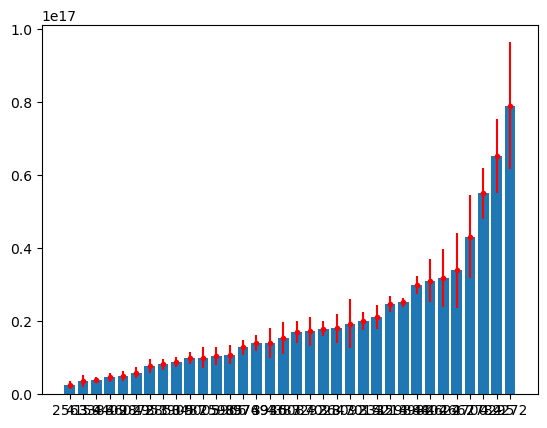

In [5]:
major_results = major_results.sort_values('best.stellar.m_star')
plt.bar(major_results['id'].astype('str'), major_results['best.stellar.m_star'])
plt.errorbar(major_results['id'].astype('str'), major_results['best.stellar.m_star'],
             yerr=major_results['bayes.stellar.m_star_err'], fmt = '.', color = 'red')


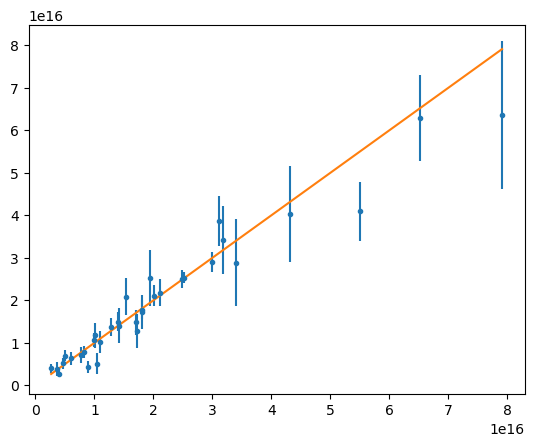

In [6]:
plt.errorbar(major_results['best.stellar.m_star'], major_results['bayes.stellar.m_star'],
             yerr=major_results['bayes.stellar.m_star_err'], fmt = '.')
plt.plot([min(major_results['best.stellar.m_star']), max(major_results['best.stellar.m_star'])],
         [min(major_results['best.stellar.m_star']), max(major_results['best.stellar.m_star'])])


/Users/hq2335/conda/anaconda3/envs/cigale_update/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='best.stellar.m_star', ylabel='Count'>

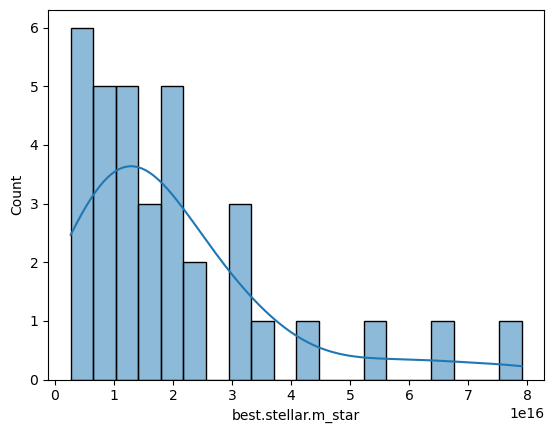

In [7]:
sns.histplot(data=major_results, x='best.stellar.m_star', bins = 20, kde = True)

/Users/hq2335/conda/anaconda3/envs/cigale_update/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='best.reduced_chi_square', ylabel='Count'>

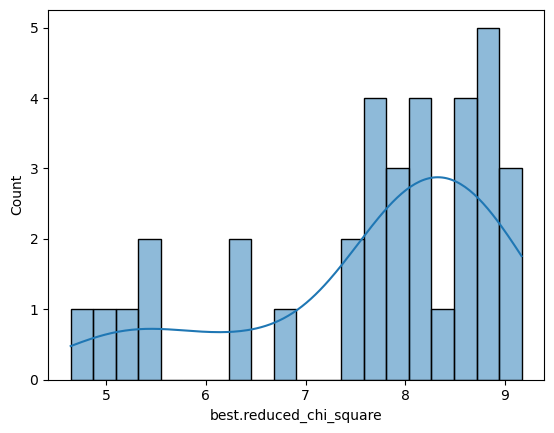

In [8]:
sns.histplot(data=major_results, x='best.reduced_chi_square', bins = 20, kde = True)

In [9]:
best_objects = major_results[major_results['best.reduced_chi_square'] <= 10].id

In [ ]:
obs_df = ascii.read('observations.txt').to_pandas()
best_obj_data = obs_df[obs_df.id.isin(best_objects)]
best_obj_data

,id,redshift,xray_boxcar_2to10keV,xray_boxcar_2to10keV_err,xray_boxcar_0p5to2keV,xray_boxcar_0p5to2keV_err,galex.FUV,galex.FUV_err,galex.NUV,galex.NUV_err,...,WISE1,WISE1_err,WISE2,WISE2_err,WISE3,WISE3_err,WISE4,WISE4_err,PSW,PSW_err
0,2563,0.304762,1.3410,0.189646,4.0720,0.575868,NaN,NaN,NaN,NaN,...,48532.0,9159.882995,42936.0,14666.032249,NaN,NaN,2600000.0,NaN,NaN,NaN
1,2598,0.360800,6.4370,0.910329,26.9000,3.804234,7474.6,1367.524282,7535.0,1346.239128,...,70214.0,12041.172572,87827.0,18752.976792,NaN,NaN,2600000.0,NaN,NaN,NaN
2,2667,0.110002,25.2500,3.570889,95.7200,13.536852,92579.0,13346.367477,100030.0,14248.397173,...,1114900.0,160313.631049,1411300.0,203193.813636,3620000.0,545822.764274,5876800.0,1.490270e+06,NaN,NaN
3,2700,0.277063,8.7300,1.234608,18.0200,2.548413,NaN,NaN,NaN,NaN,...,193210.0,28854.967649,199540.0,32419.837014,965890.0,215362.763360,2739200.0,1.333507e+06,NaN,NaN
4,2782,0.275546,7.2040,1.018799,1.6870,0.238578,NaN,NaN,7439.5,1580.924794,...,285510.0,41809.588637,389070.0,57624.679591,981740.0,221588.714857,NaN,NaN,NaN,NaN
5,2850,0.354981,1.9360,0.273792,9.9470,1.406718,NaN,NaN,NaN,NaN,...,63449.0,11026.240339,76142.0,16604.869264,NaN,NaN,2600000.0,NaN,NaN,NaN
6,2878,0.408494,21.1500,2.991062,124.3000,17.578675,NaN,NaN,NaN,NaN,...,102710.0,16029.401829,120230.0,21917.435023,NaN,NaN,2600000.0,NaN,NaN,NaN
7,3015,0.280145,0.5491,0.077654,5.5970,0.791535,NaN,NaN,NaN,NaN,...,153900.0,23242.730821,157050.0,26497.104559,412990.0,150219.089340,NaN,NaN,NaN,NaN
8,3092,0.196353,4.7880,0.677125,26.1400,3.696754,21752.0,3427.259996,22859.0,3431.541726,...,243680.0,35683.980271,247530.0,37649.988287,411710.0,135633.154066,2321600.0,8.802246e+05,NaN,NaN
9,3232,0.412714,1.0890,0.154008,3.8550,0.545179,NaN,NaN,NaN,NaN,...,83105.0,13543.824478,73456.0,16703.355313,354100.0,143426.274441,NaN,NaN,NaN,NaN


In [ ]:
best_obj_data.to_csv('best_obj_data.txt', index = False, encoding = 'ascii', sep = '\t', na_rep = float('NaN'))

#### Sort the relevant chi_2 and pdf plot

In [ ]:
obj_name = major_results.id.astype('str').to_list()
var_name = ['sfh.sfr', 'stellar.m_star', 'agn.accretion_power', 'agn.fracAGN']
file_names = []
for obj in obj_name:
    for var in var_name:
        file_names.append(obj + '_' + var + '_chi2.pdf')
        file_names.append(obj + '_' + var + '_pdf.pdf')
        file_names.append(obj + '_' + var + '_chi2-block-0.fits')
        file_names.append(obj + '_chi2-block-0.fits')
file_names[:5]

['4739_sfh.sfr_chi2.pdf',
 '4739_sfh.sfr_pdf.pdf',
 '4739_sfh.sfr_chi2-block-0.fits',
 '4739_chi2-block-0.fits',
 '4739_stellar.m_star_chi2.pdf']

In [ ]:
import shutil
import os
import glob

In [ ]:
directory = os.getcwd()
new_directory = os.path.join(directory, 'relevant_plots')
os.mkdir(new_directory)

print(directory)
print(new_directory)

/Users/hq2335/Downloads/Github/cigale_practice/out
/Users/hq2335/Downloads/Github/cigale_practice/out/relevant_plots


In [ ]:
for file in os.listdir(directory):
    if file in file_names:
        old_loc = rf"{directory}/{file}"
        new_loc = rf"{new_directory}/{file}"
        shutil.move(old_loc, new_loc)

#### Plot the Reduced chi2 plots

In [10]:

var_name = 'stellar.m_star'
obj_name = '4804'

#fchi2 = f'{obj_name}_chi2-block-0.fits'
fname = f'{obj_name}_{var_name}_chi2-block-0.npy'

# data = np.memmap(fname, dtype=np.float64, mode="w+", shape=(2, chi2.size))
data = np.memmap(fname, dtype=np.float64)
data = np.memmap(fname, dtype=np.float64, shape=(2, data.size // 2))
chi2 = data[0, :]
values = data[1, :]
data.sort(axis=0)


In [3]:
df = pd.DataFrame(data, index=['chi2', var_name]).T
df = df.dropna()
df[df.chi2 <= 5 * min(df.chi2)]
df

,chi2,stellar.m_star
0,116.263797,3.523531e+15
1,116.263797,3.523531e+15
2,116.263797,3.523531e+15
3,116.263797,3.523531e+15
4,116.263797,3.523531e+15
...,...,...
14847,332.777790,2.522317e+16
14848,332.777790,2.522317e+16
14849,332.777790,2.522317e+16
14850,332.777790,2.522317e+16


In [49]:
data = np.memmap(fname, dtype=np.float64, mode="w+", shape=(2, len(df)))
data[0, :] = df.chi2.to_numpy()
data[1, :] = df[var_name].to_numpy()
pd.DataFrame(data).T

,0,1
0,116.263797,3.523531e+15
1,116.263797,3.523531e+15
2,116.263797,3.523531e+15
3,116.263797,3.523531e+15
4,116.263797,3.523531e+15
...,...,...
14847,332.777790,2.522317e+16
14848,332.777790,2.522317e+16
14849,332.777790,2.522317e+16
14850,332.777790,2.522317e+16


In [4]:
mask = data[0, :] <= 2 * min(data[0, :])

In [5]:
data = data[:, mask]
data.shape

(2, 7469)

,0,1
0,204.872507,4.417983e+15
1,204.872507,4.417983e+15
2,204.872507,4.417983e+15
3,204.872507,4.417983e+15
4,204.872507,4.417983e+15
...,...,...
174955,NaN,NaN
174956,NaN,NaN
174957,NaN,NaN
174958,NaN,NaN


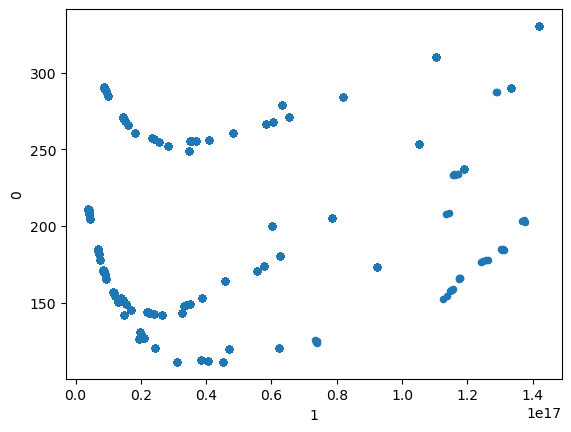

In [11]:
df = pd.DataFrame(data).T
df.plot(x=1, y= 0, kind='scatter')
df

In [ ]:
chi_data_df = pd.DataFrame([ np.ma.filled(values)[var_name], np.ma.filled(chi2)["chi2"]], index = [var_name, 'chi2']).T
chi_data_df.dtypes
# 1 / min(data_df[data_df.isna().chi2].chi2)

agn.accretion_power    float64
chi2                   float64
dtype: object

In [ ]:
chi_data_df['relative_chi2'] = chi_data_df.chi2 / min(chi_data_df.chi2)
chi_data_df.sort_values('chi2')
filtered_chi_data = chi_data_df[chi_data_df.relative_chi2 <= 2]
filtered_chi_data

,agn.accretion_power,chi2,relative_chi2
0,0.000000e+00,116.299381,1.040222
1,0.000000e+00,116.299381,1.040222
2,0.000000e+00,116.299381,1.040222
3,0.000000e+00,116.299381,1.040222
4,0.000000e+00,116.299381,1.040222
...,...,...,...
166775,0.000000e+00,154.046564,1.377846
166776,0.000000e+00,154.046564,1.377846
166777,0.000000e+00,154.046564,1.377846
166778,0.000000e+00,154.046564,1.377846


<Axes: xlabel='agn.accretion_power', ylabel='relative_chi2'>

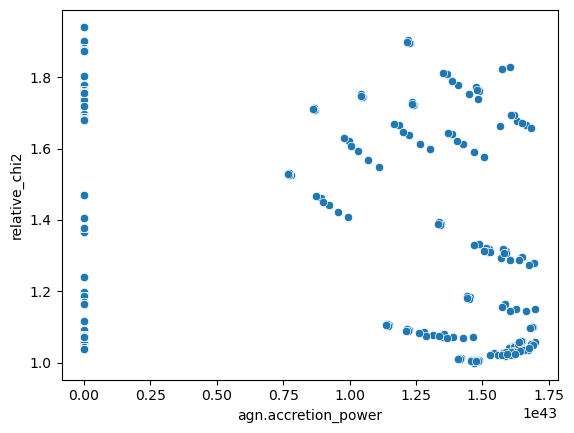

In [ ]:
sns.scatterplot(data=filtered_chi_data, x=var_name, y='relative_chi2')

In [ ]:
likelihood = []
model_variable = []
model_variable.append(filtered_chi_data[var_name].to_numpy())
likelihood.append(np.exp(-0.5 * filtered_chi_data["chi2"].to_numpy()))
likelihood

[array([7.59433984e-15, 1.21567296e-14, 5.49031166e-15, 1.36840801e-14,
        1.03848504e-14, 5.43836660e-15, 8.29983004e-15, 4.19917426e-15,
        9.59065375e-15, 8.09733650e-15, 1.39587500e-13, 2.30475326e-13,
        8.60059638e-14, 1.34224470e-13, 2.17060945e-13, 9.12825067e-14,
        2.30889630e-13, 3.45231152e-13, 1.62719697e-13, 3.40197462e-13,
        2.43557073e-13, 1.85559774e-13, 2.68838402e-13, 1.40855922e-13,
        2.76952094e-13, 2.21620304e-13, 8.47542304e-13, 1.28270508e-12,
        2.85440653e-13, 5.08412288e-13, 2.29951103e-13, 9.20800869e-13,
        1.39533128e-12, 3.50721793e-13, 6.24404221e-13, 3.22761552e-13,
        4.68619171e-12, 6.14371622e-12, 5.60197504e-12, 7.98044307e-12,
        5.90197746e-14, 7.50390731e-12, 4.36269297e-12, 5.72359763e-12,
        5.38441072e-12, 7.65750675e-12, 1.02829113e-13, 7.67903548e-12,
        8.67729257e-13, 1.11256841e-12, 8.57047608e-13, 9.39536675e-13,
        7.34268762e-13, 1.07096961e-12, 1.43245127e-12, 1.107221

In [ ]:
m_star_4951_chi2_filename = 'relevant_plots/4951_chi2-block-0.fits'
# Read the cigale output chi file
chi_data = np.memmap(m_star_4951_chi2_filename, dtype=np.float64)
chi_data = np.memmap(m_star_4951_chi2_filename, dtype=np.float64, shape=(2, chi_data.size // 2))
chi_data_df = pd.DataFrame(chi_data, index=['chi2', '4951_m_star']).T
chi_data_df['relative_chi2'] = chi_data_df.chi2 / min(chi_data_df.chi2)
chi_data_df.sort_values('chi2')
filtered_chi_data = chi_data_df[chi_data_df.relative_chi2 <= 2]
filtered_chi_data

FileNotFoundError: [Errno 2] No such file or directory: 'relevant_plots/4951_chi2-block-0.fits'